 # <center>  LAB1 - ANALIZA BŁĘDÓW </center>
# <center>  Gosztyła Mikołaj, Smółka Antoni </center> 
 

## Zadanie 1.

Oblicz przybliżoną wartość pochodnej funkcji, używając wzoru

$$
f'(x) \approx \frac{f(x + h) - f(x)}{h}.
$$

Sprawdź działanie programu dla funkcji $\tan(x)$ oraz $x = 1$. Wyznacz błąd, porównując otrzymaną wartość numerycznej pochodnej z prawdziwą wartością. Pomocna będzie tożsamość $\tan'(x) = 1 + \tan^2(x)$. Na wspólnym rysunku przedstaw wykresy wartości bezwzględnej błędu metody, błędu numerycznego oraz błędu obliczeniowego w zależności od $h$ dla $h = 10^{-k}$, $k = 0, \ldots, 16$. Użyj skali logarytmicznej na obu osiach. Czy wykres wartości bezwzględnej błędu obliczeniowego posiada minimum? Porównaj wyznaczoną wartość $h_{\min}$ z wartością otrzymaną ze wzoru

$$
h_{\min} \approx 2\sqrt{\frac{\varepsilon_{\text{mach}}}{M}}, \quad \text{gdzie} \quad M \approx |f''(x)|.
$$

Powtórz ćwiczenie używając wzoru różnic centralnych

$$
f'(x) \approx \frac{f(x + h) - f(x - h)}{2h}.
$$

Porównaj wyznaczoną wartość $h_{\min}$ z wartością otrzymaną ze wzoru

$$
h_{\min} \approx \sqrt[3]{\frac{3\varepsilon_{\text{mach}}}{M}}, \quad \text{gdzie} \quad M \approx |f'''(x)|.
$$



In [17]:
def tan_f(x=1):
    return np.tan(x)

def tan_df2(x):
    return 2 * np.tan(x) / (np.cos(x) ** 2)

def tan_df3(x):
    return (4 * np.sin(x) ** 2 + 2) / np.cos(x) ** 4

def d_f(f, h, x=1):
    return (f(x + h) - f(x)) / h

def d_f_central(f, h, x):
    return (f(x + h) - f(x - h))/(2 * h)

def real_d_f(f, x=1):
    return 1 + f(x) ** 2

def find_maximum(f, domain):
    res = minimize_scalar(lambda x: -f(x), bounds=domain, method='bounded')
    max_value = -res.fun
    return max_value

Idea jest taka, że zgodnie ze wzorem $$
|f(t)| \leq M \text{ for all } t \in [x - h, x + h]
$$

przyjmujemy, że M jest równe maksimum badanej funkcji

#### Metoda Progresywna

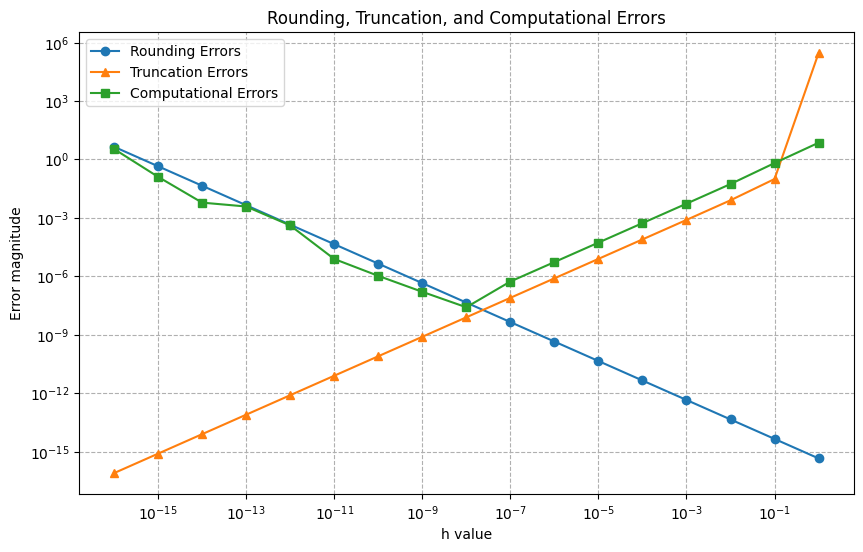

In [28]:
h_values = np.logspace(0, -16, num=17, base=10)
rounding_errors = []
truncation_errors = []
computational_errors = []
x0 = 1

for h in h_values:
    rounding_errors.append(2 * np.finfo(float).eps / h)
    truncation_errors.append(find_maximum(np.tan, (x0 - h, x0 + h)) * h / 2)
    computational_errors.append(abs(real_d_f(np.tan) - d_f(np.tan, h)))

plt.figure(figsize=(10, 6))
plt.loglog(h_values, rounding_errors, label='Rounding Errors', marker='o')
plt.loglog(h_values, truncation_errors, label='Truncation Errors', marker='^')
plt.loglog(h_values, computational_errors, label='Computational Errors', marker='s')
plt.xlabel('h value')
plt.ylabel('Error magnitude')
plt.title('Rounding, Truncation, and Computational Errors')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

Zmiana wynika z tego że funkcja tangens w $ \frac{\pi}{2} $ zmierza do nieskończoności 


Porównujemy wyznaczoną wartość $h_{\min}$ z wartością otrzymaną ze wzoru

$$
h_{\min} \approx 2\sqrt{\frac{\varepsilon_{\text{mach}}}{M}}, \quad \text{gdzie} \quad M \approx |f''(x)|.
$$


In [27]:
h_min = 2 * math.sqrt(np.finfo(float).eps / abs(tan_df2(x0)))
print(abs(h_min - h_values[8]))

8.763047748195454e-10


####  Metoda Centralna

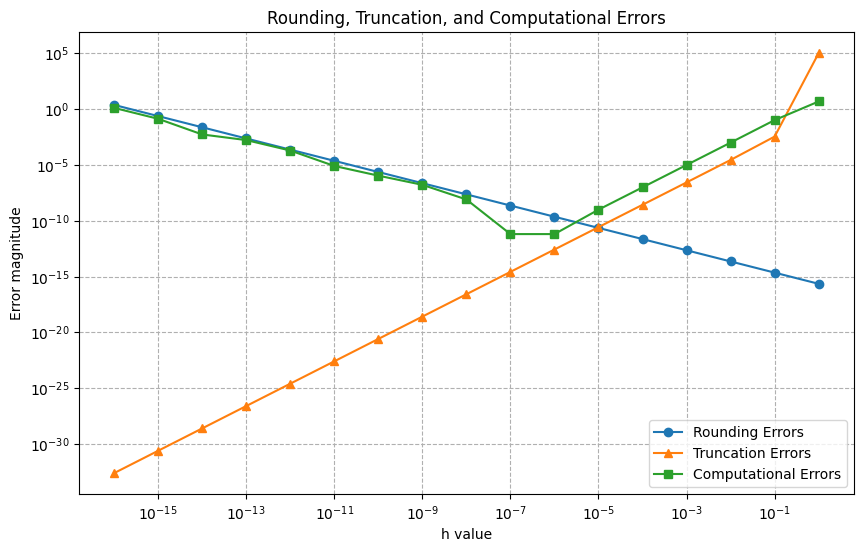

In [20]:
rounding_errors = []
truncation_errors = []
computational_errors = []
x0 = 1

for h in h_values:
    rounding_errors.append(np.finfo(float).eps / h)
    truncation_errors.append(find_maximum(np.tan, (x0 - h, x0 + h)) * h * h / 6)
    computational_errors.append(abs(real_d_f(np.tan) - d_f_central(np.tan, h, x0)))

plt.figure(figsize=(10, 6))
plt.loglog(h_values, rounding_errors, label='Rounding Errors', marker='o')
plt.loglog(h_values, truncation_errors, label='Truncation Errors', marker='^')
plt.loglog(h_values, computational_errors, label='Computational Errors', marker='s')
plt.xlabel('h value')
plt.ylabel('Error magnitude')
plt.title('Rounding, Truncation, and Computational Errors')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

Porównujemy wyznaczoną wartość $h_{\min}$ z wartością otrzymaną ze wzoru

$$
h_{\min} \approx \sqrt[3]{\frac{3\varepsilon_{\text{mach}}}{M}}, \quad \text{gdzie} \quad M \approx |f'''(x)|.
$$

In [21]:
h2_min = math.pow(3 * np.finfo(float).eps / abs(tan_df3(x0)), 1/3)
print(abs(h_values[7] - h2_min))

2.173274156839064e-06


## Zadanie 2
Napisz program generujący pierwsze _n_ wyrazów ciągu zdefiniowanego równaniem różnicowym:

$$ x_{k+1} = 2.25x_k - 0.5x_{k-1} $$

z wyrazami początkowymi:

$$ x_0 = \frac{1}{3}, \quad x_1 = \frac{1}{12} $$

Wykonaj obliczenia:

- używając pojedynczej precyzji oraz przyjmując _n_ = 225
- używając podwójnej precyzji oraz przyjmując _n_ = 60
- używając reprezentacji z biblioteki `fractions` oraz przyjmując _n_ = 225.

Narysuj wykres wartości ciągu w zależności od _k_. Użyj skali logarytmicznej na osi y (pomocna będzie funkcja `semilogy`). Następnie narysuj wykres przedstawiający wartość bezwzględną błędu względnego w zależności od _k_.

Dokładne rozwiązanie równania różnicowego:

$$ x_k = \frac{4^{-k}}{3} $$

maleje wraz ze wzrostem _k_. Czy otrzymany wykres zachowa się w ten sposób? Wyjaśnij otrzymane wyniki.

Unikaj pętli na rzecz kodu wektorowego oraz funkcji uniwersalnych (np. `np.tan` zamiast `math.tan`).
